<a href="https://colab.research.google.com/github/DataScienceAndEngineering/hw2p3-s24-classification-of-1-d-data-and-bayes-error-adnanarnaout/blob/main/HW2_Adnan_Arnaout_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part A)

The probability density function for a normal distribution is given by:

$$
p_{\mu,\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

And the probability of measuring a weight in interval \( I = [x_1, x_2] \) of bean of that type is given by:

$$
P_{\mu,\sigma}(I) = \int_{x_1}^{x_2} p_{\mu,\sigma}(x) \, dx
$$

Therefore:

For bean type A when it's actually type B:

$$
P_{\text{A when B}}(T) = \int_{-\infty}^{T} \frac{1}{1.4\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-4}{1.4}\right)^2} \, dx
$$

For bean type B when it's actually type A:

$$
P_{\text{B when A}}(T) = \int_{T}^{+\infty} \frac{1}{2\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-5}{2}\right)^2} \, dx
$$


Part B)

Probabilities can calculated using the cumulative distribution function (CDF) of the normal distributions:

$$
P_{\text{A when B}}(T) = \Phi\left(\frac{T - \mu_B}{\sigma_B}\right)
$$

$$
P_{\text{B when A}}(T) = 1 - \Phi\left(\frac{T - \mu_A}{\sigma_A}\right)
$$

Also, The Bayes error is defined as:

$$
\text{Bayes Error}(T) = \frac{1}{2}\left(P_{\text{A when B}}(T) + P_{\text{B when A}}(T)\right)
$$


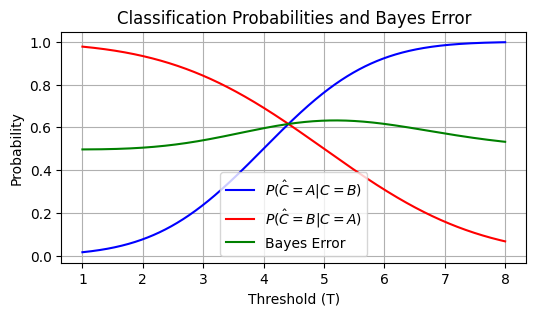

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu_A = 5
sigma_A = 2
mu_B = 4
sigma_B = 1.4

#Generate values
x_values = np.linspace(1, 8, 1000)

#Theoretical probabilities using CDF
P_A_given_B = norm.cdf(x_values, mu_B, sigma_B)
P_B_given_A = 1 - norm.cdf(x_values, mu_A, sigma_A)

#Bayes error as a function of T
Bayes_error = 0.5 * (P_A_given_B + P_B_given_A)

#Plotting the probabilities and Bayes error
plt.figure(figsize=(6, 3))

plt.plot(x_values, P_A_given_B, label='$P(\\hat{C} = A | C = B)$', color='blue')

plt.plot(x_values, P_B_given_A, label='$P(\\hat{C} = B | C = A)$', color='red')

plt.plot(x_values, Bayes_error, label='Bayes Error', color='green')

plt.xlabel('Threshold (T)')
plt.ylabel('Probability')
plt.title('Classification Probabilities and Bayes Error')
plt.legend()
plt.grid(True)
plt.show()

Part C)

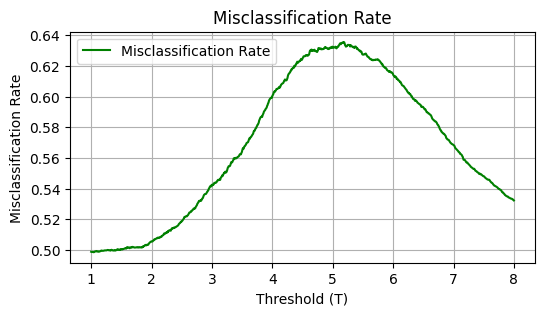

In [21]:
np.random.seed(0)

n = 10000

#Data points for bean type A and B
data_A = np.random.normal(mu_A, sigma_A, n // 2)
data_B = np.random.normal(mu_B, sigma_B, n // 2)

#Generate T values
T_values = np.linspace(1, 8, 1000)

#Function to compute misclassification rate for a given threshold T
def compute_misclassification_rate(data_A, data_B, T):

    misclassification_A = np.mean(data_A > T)

    misclassification_B = np.mean(data_B < T)

    return 0.5 * (misclassification_A + misclassification_B)

#Compute the misclassification rate for each T
misclassification_rates = [compute_misclassification_rate(data_A, data_B, T)
 for T in T_values]

#Plotting the misclassification rate
plt.figure(figsize=(6, 3))
plt.plot(T_values, misclassification_rates,
         label='Misclassification Rate', color='green')
plt.xlabel('Threshold (T)')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate')
plt.legend()
plt.grid(True)
plt.show()


The computed misclassification rate in part C) matches the bayes error in part C)